# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# Your code here :

# Merge both DF :

df2018 = pd.merge(df_main, df_opinion, how = "left", left_on = 'DATE', right_on = 'date')
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,very bad


In [ ]:
# Drop the 'date' column :

df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

In [ ]:
df2018 # Display the 365 rows x 20 columns --> ok

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,very bad


# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
# Confirmation qu'il manque bien des valeurs dans la colonne "Sunhour" :

df2018.isna().sum()

DATE                       0
MAX_TEMPERATURE_C          0
MIN_TEMPERATURE_C          0
WINDSPEED_MAX_KMH          0
TEMPERATURE_MORNING_C      0
TEMPERATURE_NOON_C         0
TEMPERATURE_EVENING_C      0
PRECIP_TOTAL_DAY_MM        0
HUMIDITY_MAX_PERCENT       0
VISIBILITY_AVG_KM          0
PRESSURE_MAX_MB            0
CLOUDCOVER_AVG_PERCENT     0
HEATINDEX_MAX_C            0
DEWPOINT_MAX_C             0
WINDTEMP_MAX_C             0
WEATHER_CODE_EVENING      24
TOTAL_SNOW_MM             24
UV_INDEX                  24
SUNHOUR                   24
OPINION                   24
dtype: int64

In [ ]:
# A DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.

df_clean = df2018.dropna(axis = 0, subset = ['SUNHOUR'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    341 non-null    object 
 1   MAX_TEMPERATURE_C       341 non-null    int64  
 2   MIN_TEMPERATURE_C       341 non-null    int64  
 3   WINDSPEED_MAX_KMH       341 non-null    int64  
 4   TEMPERATURE_MORNING_C   341 non-null    int64  
 5   TEMPERATURE_NOON_C      341 non-null    int64  
 6   TEMPERATURE_EVENING_C   341 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     341 non-null    float64
 8   HUMIDITY_MAX_PERCENT    341 non-null    int64  
 9   VISIBILITY_AVG_KM       341 non-null    float64
 10  PRESSURE_MAX_MB         341 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  341 non-null    float64
 12  HEATINDEX_MAX_C         341 non-null    int64  
 13  DEWPOINT_MAX_C          341 non-null    int64  
 14  WINDTEMP_MAX_C          341 non-null    in

In [ ]:
# Alternative possible :

# mask = df2018.isnull().any(axis = 1) # axis = 1 --> rows
# df_clean = df2018[~mask]

In [ ]:
# A DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns

df_nan = df2018[df2018['SUNHOUR'].isna()]

In [ ]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    24 non-null     object 
 1   MAX_TEMPERATURE_C       24 non-null     int64  
 2   MIN_TEMPERATURE_C       24 non-null     int64  
 3   WINDSPEED_MAX_KMH       24 non-null     int64  
 4   TEMPERATURE_MORNING_C   24 non-null     int64  
 5   TEMPERATURE_NOON_C      24 non-null     int64  
 6   TEMPERATURE_EVENING_C   24 non-null     int64  
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64  
 9   VISIBILITY_AVG_KM       24 non-null     float64
 10  PRESSURE_MAX_MB         24 non-null     int64  
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64
 12  HEATINDEX_MAX_C         24 non-null     int64  
 13  DEWPOINT_MAX_C          24 non-null     int64  
 14  WINDTEMP_MAX_C          24 non-null     in

## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
# Your code here

X = df_clean[["MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C", "WINDSPEED_MAX_KMH", "TEMPERATURE_MORNING_C", "TEMPERATURE_NOON_C", "TEMPERATURE_EVENING_C", "PRECIP_TOTAL_DAY_MM", "HUMIDITY_MAX_PERCENT", "VISIBILITY_AVG_KM", "PRESSURE_MAX_MB", "CLOUDCOVER_AVG_PERCENT",
                "HEATINDEX_MAX_C", "DEWPOINT_MAX_C", "WINDTEMP_MAX_C"]] 
y = df_clean["SUNHOUR"] 

In [ ]:
# Here, we split our 2 datasets (the variables "X3" and the target "y") into 4 datasets X and y for the train set and X and y for the test set.
# We set the size of the train set to 75%. And the rest is for the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86


In [ ]:
# Train the train dataset model :

model_from_clean = LinearRegression().fit(X_train, y_train)

In [ ]:
# Scores :

print("\nScore for the Train dataset :", model_from_clean.score(X_train, y_train))
print("Score for the Test dataset :", model_from_clean.score(X_test, y_test))


Score for the Train dataset : 0.7484627749573181
Score for the Test dataset : 0.6867969358464601


In [ ]:
# Second model :

X2 = df_clean[[ "WINDSPEED_MAX_KMH", "HUMIDITY_MAX_PERCENT", "VISIBILITY_AVG_KM", "CLOUDCOVER_AVG_PERCENT", "HEATINDEX_MAX_C", "UV_INDEX"]] 
y = df_clean["SUNHOUR"] 

In [ ]:
# Here, we split our 2 datasets (the variables "X3" and the target "y") into 4 datasets X and y for the train set and X and y for the test set.
# We set the size of the train set to 75%. And the rest is for the test set.

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state = 42, train_size = 0.75)
print("The length of the initial dataset is :", len(X2))
print("The length of the train dataset is   :", len(X2_train))
print("The length of the test dataset is    :", len(X2_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86


In [ ]:
# Train the train dataset model :

second_model = LinearRegression().fit(X2_train, y_train)

In [ ]:
# Scores :

print("\nScore for the Train dataset :", second_model.score(X2_train, y_train))
print("Score for the Test dataset :", second_model.score(X2_test, y_test))


Score for the Train dataset : 0.6588429783075016
Score for the Test dataset : 0.5883241692168104


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:
df_nan["SUNHOUR"] = model_from_clean.predict(df_nan[["MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C", "WINDSPEED_MAX_KMH", "TEMPERATURE_MORNING_C", "TEMPERATURE_NOON_C", "TEMPERATURE_EVENING_C", "PRECIP_TOTAL_DAY_MM", "HUMIDITY_MAX_PERCENT", "VISIBILITY_AVG_KM", "PRESSURE_MAX_MB", "CLOUDCOVER_AVG_PERCENT",
                "HEATINDEX_MAX_C", "DEWPOINT_MAX_C", "WINDTEMP_MAX_C"]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    24 non-null     object 
 1   MAX_TEMPERATURE_C       24 non-null     int64  
 2   MIN_TEMPERATURE_C       24 non-null     int64  
 3   WINDSPEED_MAX_KMH       24 non-null     int64  
 4   TEMPERATURE_MORNING_C   24 non-null     int64  
 5   TEMPERATURE_NOON_C      24 non-null     int64  
 6   TEMPERATURE_EVENING_C   24 non-null     int64  
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64  
 9   VISIBILITY_AVG_KM       24 non-null     float64
 10  PRESSURE_MAX_MB         24 non-null     int64  
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64
 12  HEATINDEX_MAX_C         24 non-null     int64  
 13  DEWPOINT_MAX_C          24 non-null     int64  
 14  WINDTEMP_MAX_C          24 non-null     in

In [ ]:
df_nan.head(24)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.000,10,6,5,NaN,NaN,NaN,7.404351,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.500,8,3,2,NaN,NaN,NaN,8.123330,NaN
66,2018-03-08,13,7,23,7,12,9,0.4,87,9.750,1005,52.625,13,7,6,NaN,NaN,NaN,7.631020,NaN
100,2018-04-11,15,7,14,7,15,12,1.2,87,7.875,1002,59.125,15,10,10,NaN,NaN,NaN,9.596273,NaN
118,2018-04-29,10,7,23,8,10,8,0.7,93,9.000,1008,85.000,10,9,7,NaN,NaN,NaN,6.326108,NaN
143,2018-05-24,23,12,8,14,22,21,1.4,81,7.875,1018,27.250,25,17,19,NaN,NaN,NaN,14.149236,NaN
152,2018-06-02,23,12,5,15,23,21,1.0,75,9.875,1021,24.750,25,18,20,NaN,NaN,NaN,14.088482,NaN
163,2018-06-13,20,12,10,13,20,19,0.3,72,9.000,1020,36.875,21,16,18,NaN,NaN,NaN,12.704740,NaN
165,2018-06-15,19,13,16,14,19,18,0.1,85,8.000,1019,61.625,19,15,16,NaN,NaN,NaN,10.123882,NaN
175,2018-06-25,25,13,22,15,24,24,0.0,71,10.000,1023,4.750,26,19,20,NaN,NaN,NaN,15.652060,NaN


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

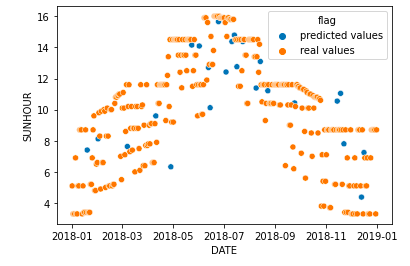

In [ ]:
# Ajout d'une colonne 'flag' pour avoir les lignes avec valeurs réelles / valeurs prédites

df_clean['flag'] = 'Real values'
df_nan['flag'] = 'Predicted values'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Your code here

# Concatenate both DataFrames :

df2018complete = pd.concat([df_clean, df_nan])
df2018complete['DATE'] = pd.to_datetime(df2018complete['DATE'])
df2018complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 349
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C       365 non-null    int64         
 2   MIN_TEMPERATURE_C       365 non-null    int64         
 3   WINDSPEED_MAX_KMH       365 non-null    int64         
 4   TEMPERATURE_MORNING_C   365 non-null    int64         
 5   TEMPERATURE_NOON_C      365 non-null    int64         
 6   TEMPERATURE_EVENING_C   365 non-null    int64         
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64       
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64         
 9   VISIBILITY_AVG_KM       365 non-null    float64       
 10  PRESSURE_MAX_MB         365 non-null    int64         
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64       
 12  HEATINDEX_MAX_C         365 non-null    int64     

In [ ]:
df2018complete

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.100000,bad,Real values
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.300000,bad,Real values
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.300000,bad,Real values
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.300000,bad,Real values
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.900000,bad,Real values
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2018-11-14,15,7,16,7,15,12,0.0,83,9.000,1027,22.000,16,13,8,NaN,NaN,NaN,10.548644,NaN,Predicted values
321,2018-11-18,9,4,27,4,9,6,0.0,77,10.000,1018,0.375,9,3,1,NaN,NaN,NaN,11.046939,NaN,Predicted values
325,2018-11-22,12,2,16,3,10,8,0.8,90,9.625,1014,44.500,12,8,2,NaN,NaN,NaN,7.804186,NaN,Predicted values
346,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,NaN,NaN,NaN,4.381186,NaN,Predicted values


In [ ]:
# Conversions :

df_clean['DATE'] = pd.to_datetime(df_clean['DATE'])
df_nan['DATE'] = pd.to_datetime(df_nan['DATE'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



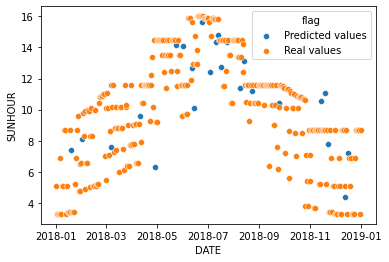

In [ ]:
# Scatterplot :

sns.scatterplot(data = df_nan, x = "DATE", y = "SUNHOUR")
sns.scatterplot(data = df_clean, x = "DATE", y = "SUNHOUR")


plt.xlabel("DATE")
plt.ylabel("SUNHOUR")
plt.legend(["Predicted values", "Real values"], title = "flag", loc = 'upper right')

plt.show()